In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pyabf

In [17]:
%matplotlib inline
%run "./functions collections.py"

In [3]:
fp = "D:/Lab data at Harvard/Clampex Data/20180711 simulation test/"
fl = os.listdir(fp)
data_names = [fp + fl[i] for i in range(len(fl))]
data_names

['D:/Lab data at Harvard/Clampex Data/20180711 simulation test/10mv001.abf',
 'D:/Lab data at Harvard/Clampex Data/20180711 simulation test/10mv002.abf',
 'D:/Lab data at Harvard/Clampex Data/20180711 simulation test/49mv001.abf',
 'D:/Lab data at Harvard/Clampex Data/20180711 simulation test/49mv002.abf',
 'D:/Lab data at Harvard/Clampex Data/20180711 simulation test/4mv001.abf']

# 49 mV cardiac pulse simulation

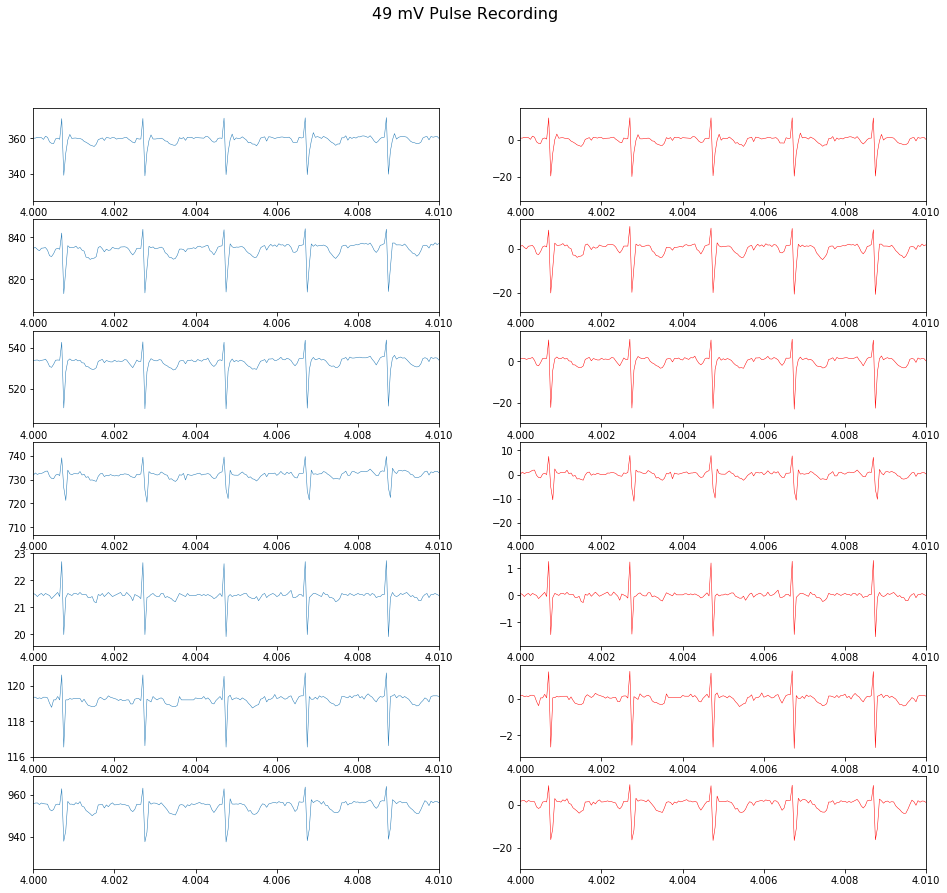

In [4]:
pulse_49 = pyabf.ABF(data_names[-2])
pulse_49.setSweep(0)
data = np.reshape(pulse_49.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("49 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_49.dataX, data[:,i+1]*-1000, lw=0.5)
    ax[i,0].set_xlim(4.0, 4.01)
    ax[i,1].plot(pulse_49.dataX, data_hf[:,i+1]*-1000, color='r', lw=0.5)
    ax[i,1].set_xlim(4.0, 4.01)

# 10 mV cardiac pulse simulation

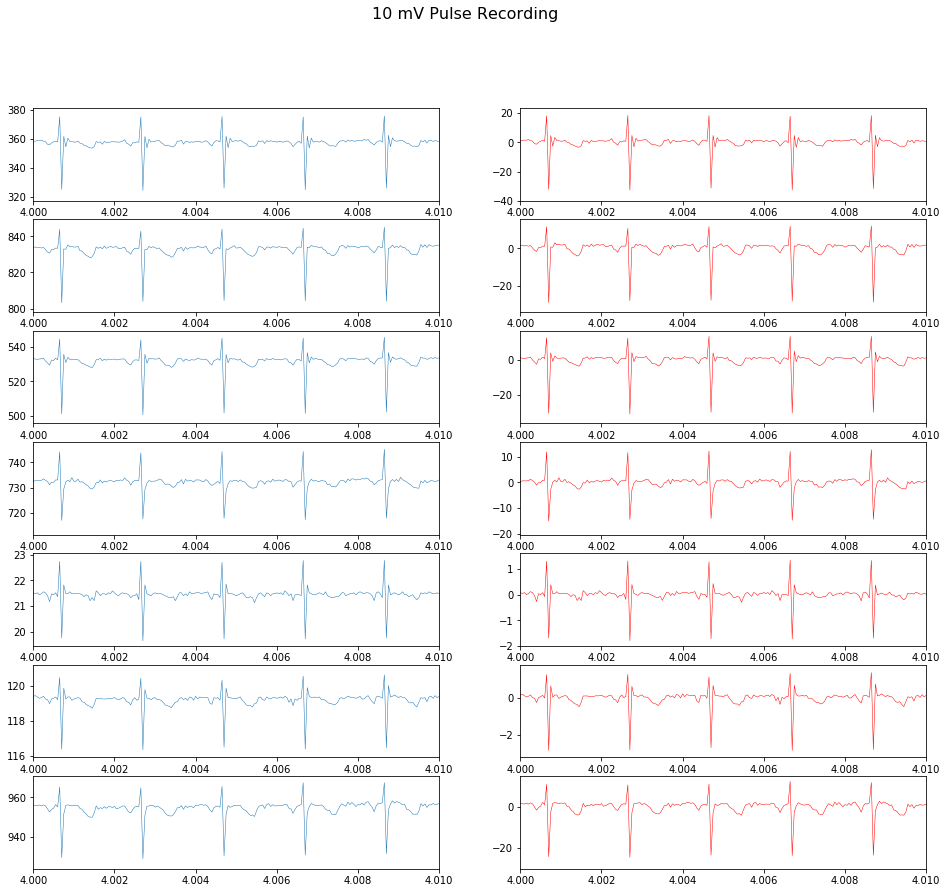

In [5]:
pulse_10 = pyabf.ABF(data_names[2])
pulse_10.setSweep(0)
data = np.reshape(pulse_10.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("10 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_10.dataX, data[:,i+1]*-1000, lw=0.5)
    ax[i,0].set_xlim(4.0, 4.01)
    ax[i,1].plot(pulse_10.dataX, data_hf[:,i+1]*-1000, color='r', lw=0.5)
    ax[i,1].set_xlim(4.0, 4.01)

# 4 mV cardiac pulse simulation

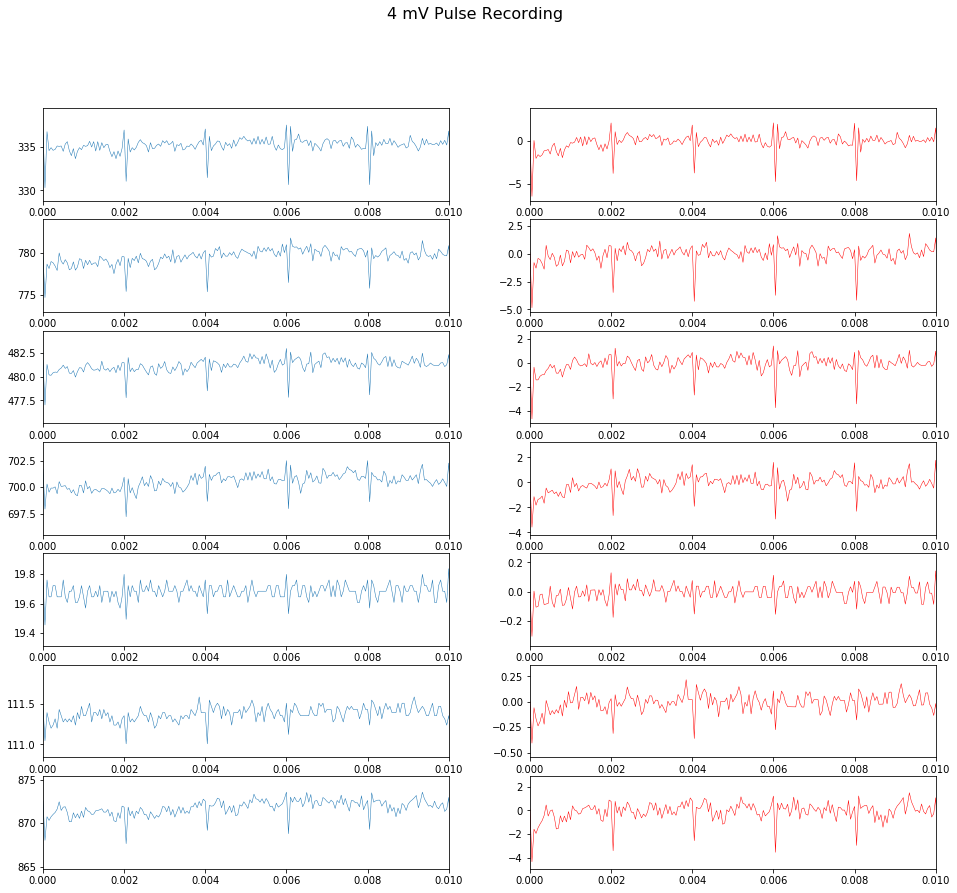

In [6]:
pulse_4 = pyabf.ABF(data_names[-1])
pulse_4.setSweep(0)
data = np.reshape(pulse_4.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("4 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_4.dataX, data[:,i+1]*-1000, lw=0.5)
    ax[i,0].set_xlim(0.0, 0.01)
    ax[i,1].plot(pulse_4.dataX, data_hf[:,i+1]*-1000, color='r', lw=0.5)
    ax[i,1].set_xlim(0.0, 0.01)

# Data normalization with median absolute deviation

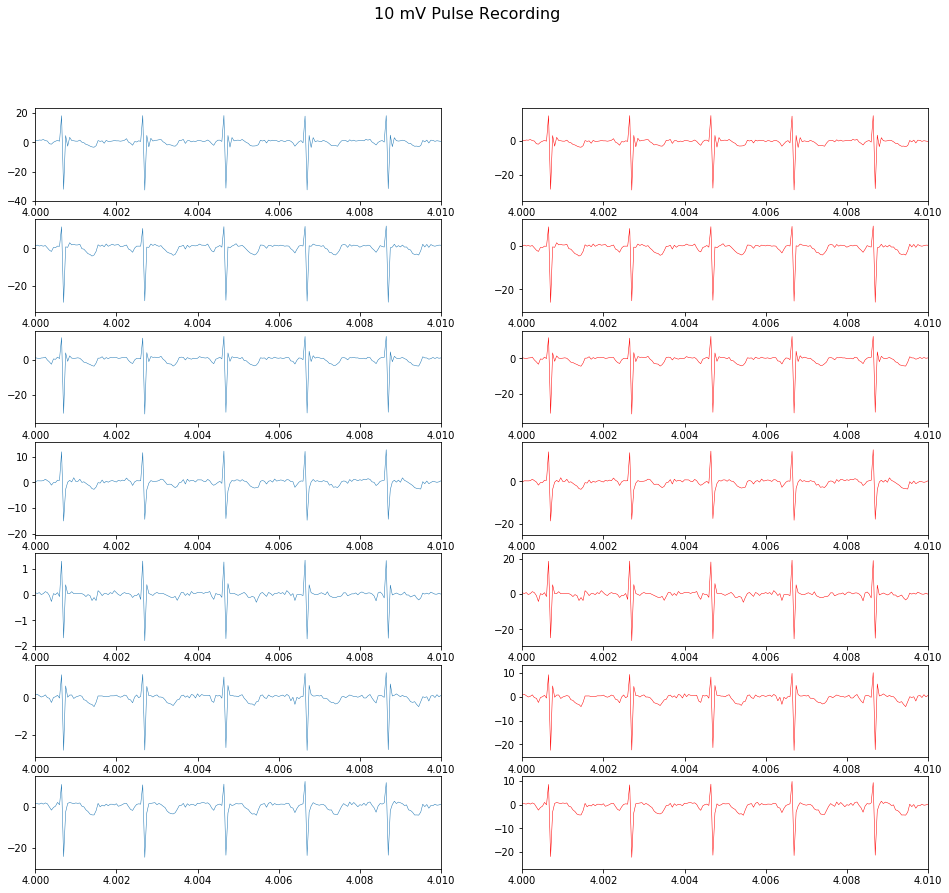

In [7]:
pulse_10 = pyabf.ABF(data_names[2])
pulse_10.setSweep(0)
data = np.reshape(pulse_10.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_nor = Normalize(data_hf)
#data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("10 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_10.dataX, data_hf[:,i+1]*-1000, lw=0.5)
    ax[i,0].set_xlim(4.0, 4.01)
    ax[i,1].plot(pulse_10.dataX, data_nor[:,i+1]*-1, color='r', lw=0.5)
    ax[i,1].set_xlim(4.0, 4.01)

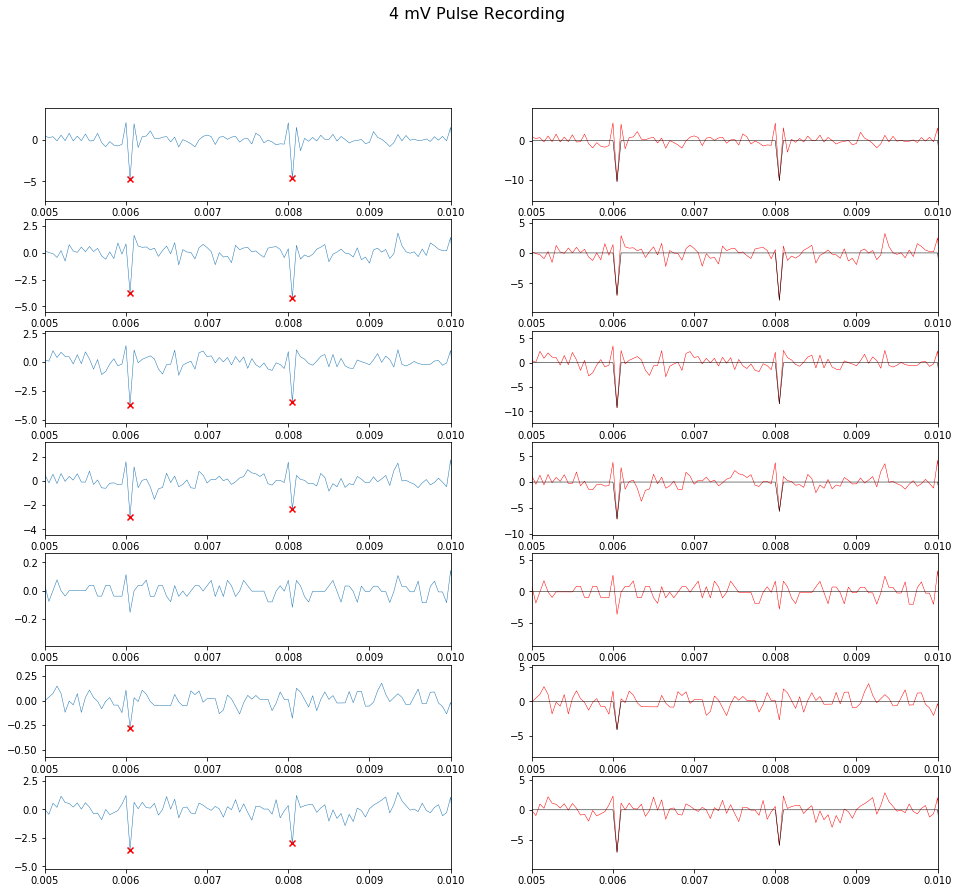

In [13]:
pulse_4 = pyabf.ABF(data_names[-1])
pulse_4.setSweep(0)
data = np.reshape(pulse_4.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_nor = Normalize(data_hf)
data_rec = np.copy(data_nor)
data_rec[data_rec < 4] = 0
#data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("4 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_4.dataX, data_hf[:,i+1]*-1000, lw=0.5)
    peaks = Peaks(data_rec[:,i+1])
    ax[i,0].scatter(pulse_4.dataX[peaks], data_hf[peaks,i+1]*-1000, c='r', marker='x')
    ax[i,0].set_xlim(0.005, 0.01)
    
    ax[i,1].plot(pulse_4.dataX, data_nor[:,i+1]*-1, color='r', lw=0.5)
    ax[i,1].plot(pulse_4.dataX, data_rec[:,i+1]*-1, color='k', lw=0.5)
    ax[i,1].set_xlim(0.005, 0.01)

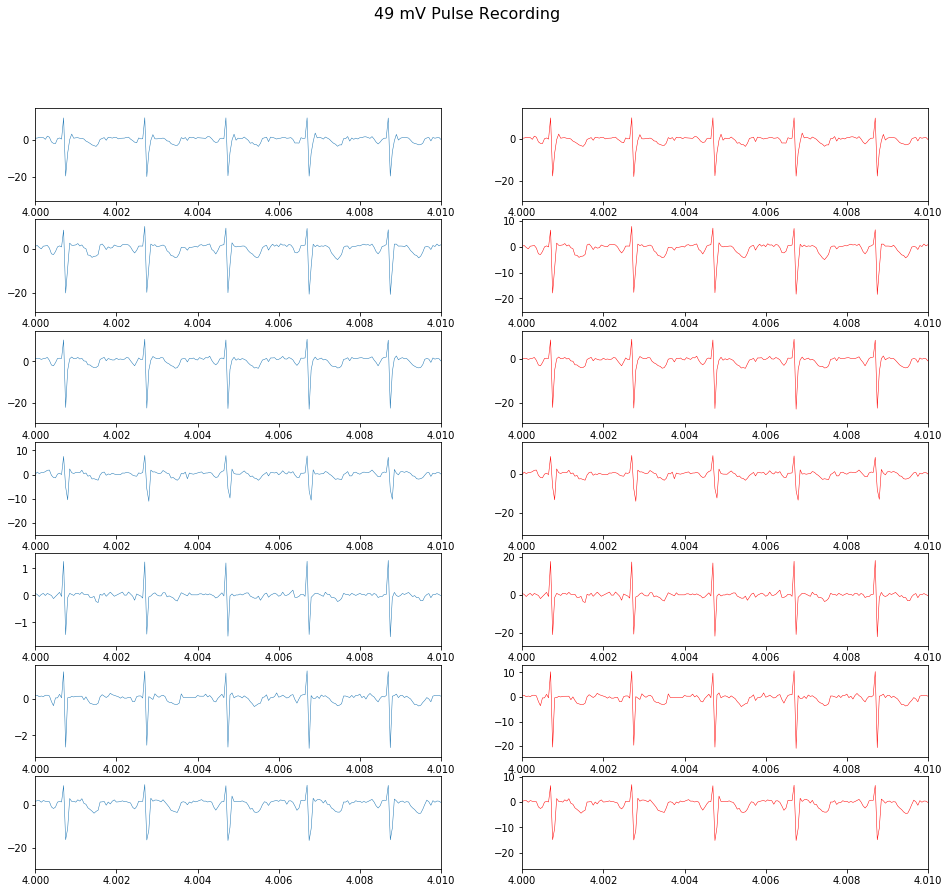

In [9]:
pulse_49 = pyabf.ABF(data_names[-2])
pulse_49.setSweep(0)
data = np.reshape(pulse_49.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_nor = Normalize(data_hf)
#data_lf = Butter_lowpass_filter(data, 5000, 20000, order=2)
#data_bf = Butter_lowpass_filter(data_hf, 5000, 20000, order=2)

fig, ax = plt.subplots(7, 2, figsize=(16, 14));
fig.suptitle("49 mV Pulse Recording", fontsize=16);
for i in range(7):
    ax[i,0].plot(pulse_49.dataX, data_hf[:,i+1]*-1000, lw=0.5)
    ax[i,0].set_xlim(4.0, 4.01)
    ax[i,1].plot(pulse_49.dataX, data_nor[:,i+1]*-1, color='r', lw=0.5)
    ax[i,1].set_xlim(4.0, 4.01)

# Spike detection and cut

In [19]:
pulse_4 = pyabf.ABF(data_names[-1])
pulse_4.setSweep(0)
data = np.reshape(pulse_4.signalData, (100000, 8))
data_hf = Butter_highpass_filter(data, 200, 20000, order=2)
data_nor = Normalize(data_hf)
data_rec = np.copy(data_nor)
data_rec[data_rec < 4] = 0
peak_pos = Peaks(data_rec)

spike_4  = Spike_event(data_hf, peak_pos)
time = np.linspace(0., 3., 61)

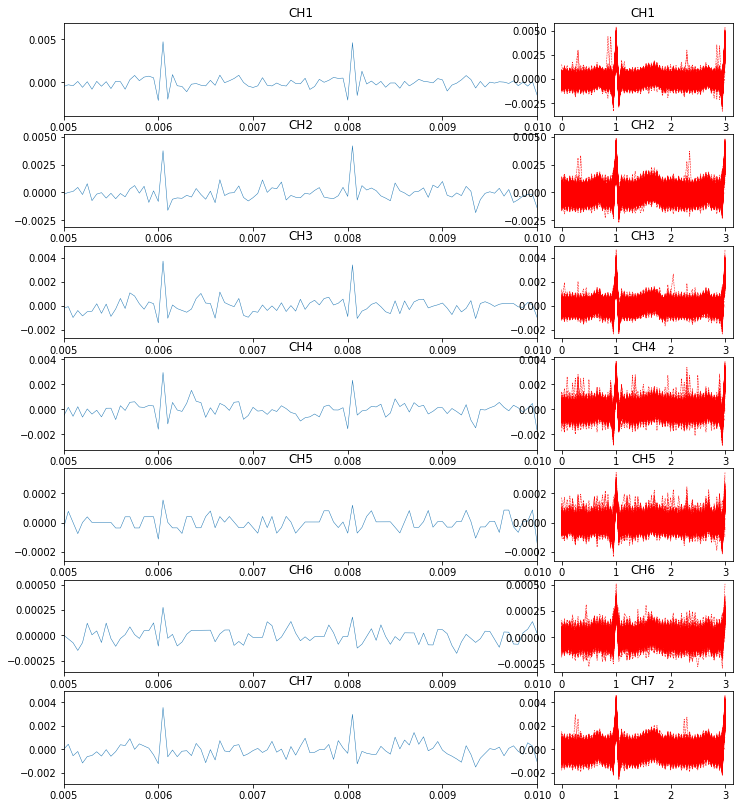

In [23]:
from matplotlib import gridspec
fig = plt.figure(1)
gridspec.GridSpec(7,7)

for j in range(7):

    plt.subplot2grid((7,7), (j, 0), colspan=5, rowspan=1)
    plt.title('CH' + str(j+1))
    plt.plot(pulse_4.dataX, data_hf[:, j+1], lw=0.5)
    plt.xlim(0.005, 0.01)

    plt.subplot2grid((7,7), (j, 5), colspan=2, rowspan=1)
    for i in range(len(spike_4)):
        if spike_4[i][1] == j+1:
            plt.plot(time, spike_4[i][2], 'r--', lw=0.5);
        else:
            pass
    plt.title('CH' + str(j+1))

fig.set_size_inches(w=12, h=14)
